<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/SHL/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
train_data = np.load('/content/drive/MyDrive/SHLdatasets/train_data_5sec.npy')
train_label = np.load('/content/drive/MyDrive/SHLdatasets/train_label_5sec.npy')

val_data = np.load('/content/drive/MyDrive/SHLdatasets/val_data_5sec.npy')
val_label= np.load('/content/drive/MyDrive/SHLdatasets/val_label_5sec.npy')

In [2]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(42559, 500, 17)
(42559, 9)
(17535, 500, 17)
(17535, 9)


[-0.6266284  -1.8022208   1.92599286  0.06325357 -0.20337966 -0.09326301
 -0.00430304  1.37128901 -0.94727814 -0.29262427  0.          0.
  0.         -0.28621907 -0.16696666 -0.02682953 -0.05032465]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [3]:
train_data = np.nan_to_num(train_data)
val_data = np.nan_to_num(val_data)

In [4]:
from keras import regularizers
# from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(16, input_shape=(500, 17), return_sequences=True))
model.add(layers.LSTM(16))
# ,kernel_regularizer=regularizers.l2(0.001) , recurrent_dropout = 0.5, return_sequences=True
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(train_data,
                     train_label,
                     epochs=20,
                     batch_size=256,
                     validation_data = (val_data, val_label))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500, 16)           2176      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 9)                 153       
                                                                 
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
84/84 [==============================] - 33s 308ms/step - loss: 1.7441 - accuracy: 0.3930 - val_loss: 2.1558 - val_accuracy: 0.1655
Epoch 2/20
84/84 [==============================] - 23s 277ms/step - loss: 1.3840 - accuracy: 0.5247 - val_loss: 2.1326 - val_accuracy: 0.1438
Epoch 3/20
84/84 [==============

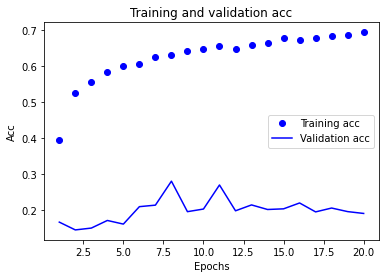

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [15]:
model.evaluate(val_data, val_label)

548/548 [==============================] - 66s 121ms/step - loss: 2.6815 - accuracy: 0.1896


[2.681549310684204, 0.1896207630634308]